# NumPy Tutorial

In [1]:
import numpy as np

In [3]:
prices_list = [100.5, 101.2, 99.8, 102.5, 103.0]
prices_array = np.array(prices_list)
print("Array:", prices_array)
print("Type:", type(prices_array))

Array: [100.5 101.2  99.8 102.5 103. ]
Type: <class 'numpy.ndarray'>


In [4]:
mean_price = np.mean(prices_array)
std_dev = np.std(prices_array)
print(f"Mean Price: {mean_price}")
print(f"Volatility (Std Dev): {std_dev}")

Mean Price: 101.4
Volatility (Std Dev): 1.1983321743156201


In [5]:
# Simulate a 5% market crash on all prices
crash_prices = prices_array * 0.95
print("Prices after 5% drop:", crash_prices)

Prices after 5% drop: [95.475 96.14  94.81  97.375 97.85 ]


# Pandas Tutorial

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Generating a date range
dates = pd.date_range(start='2024-01-01', periods=10, freq='D' )

# Creating a DataFrame
data = {
'Date': dates,
'Close_Price': [150, 152, 149, 155, 157, 153, 158, 160, 159, 162],
'Sentiment_Score': np.random.uniform(0, 1, 10), # Random sentiment between 0 and 1
'Volume': np.random.randint(10000, 50000, 10)
}

df = pd.DataFrame(data)
df.set_index('Date', inplace=True) 

print("Top 5 rows of our dataset:")
display(df.head())

Top 5 rows of our dataset:


,Close_Price,Sentiment_Score,Volume
Date,,,
2024-01-01,150,0.066924,35373
2024-01-02,152,0.353042,46264
2024-01-03,149,0.054934,32299
2024-01-04,155,0.092063,27280
2024-01-05,157,0.435667,24312


In [10]:
# Filter for days where Volume is greater than 30,000
high_volume_days = df[df['Volume'] > 30000]
print("\nHigh Volume Days:")
display(high_volume_days)


High Volume Days:


,Close_Price,Sentiment_Score,Volume
Date,,,
2024-01-01,150,0.066924,35373
2024-01-02,152,0.353042,46264
2024-01-03,149,0.054934,32299
2024-01-07,158,0.864971,48013
2024-01-10,162,0.935157,32859


In [11]:
# Daily Change: Price_t - Price_{t-1}
df['Price_Change' ] = df['Close_Price' ].diff()

# Percentage Return (Daily Returns)
df['Daily_Return'] = df['Close_Price'].pct_change() * 100

display(df.head())

,Close_Price,Sentiment_Score,Volume,Price_Change,Daily_Return
Date,,,,,
2024-01-01,150,0.066924,35373,NaN,NaN
2024-01-02,152,0.353042,46264,2.0,1.333333
2024-01-03,149,0.054934,32299,-3.0,-1.973684
2024-01-04,155,0.092063,27280,6.0,4.026846
2024-01-05,157,0.435667,24312,2.0,1.290323


In [13]:
average_price = df['Close_Price' ].mean()
max_sentiment = df['Sentiment_Score' ].max()

print(f"Average Closing Price: {average_price :.2f}")
print(f"Maximum Sentiment Score: {max_sentiment :.4f}")

Average Closing Price: 155.50
Maximum Sentiment Score: 0.9720


# Natural Language Processing Fundamentals

In [1]:
import nltk

In [2]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Lenovo\AppData\Roaming\nltk_data

True

# Text Preprocessing

### Tokenization

In [16]:
from nltk.tokenize import word_tokenize
text = "Apple stock surges 5% on strong earnings!"
tokens = word_tokenize(text)
print (tokens)

['Apple', 'stock', 'surges', '5', '%', 'on', 'strong', 'earnings', '!']


### Stop Words Removal

In [17]:
from nltk.corpus import stopwords
stop_words = set (stopwords. words('english'))
filtered = [w for w in tokens if w.lower() not in stop_words]
print (filtered)

['Apple', 'stock', 'surges', '5', '%', 'strong', 'earnings', '!']


### Lemmatization

In [18]:
# Initialize WordNet Lemmatizer to convert words into their base (dictionary) form
# Lemmatization helps reduce different word forms (e.g., 'running', 'ran') to a common root ('run')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each word in the filtered list assuming the words are verbs (pos='v')
# This improves accuracy for action words commonly found in news and financial text
lemmatized = [lemmatizer.lemmatize(w, pos='v') for w in filtered]

# Print the final list of lemmatized words
print(lemmatized)

['Apple', 'stock', 'surge', '5', '%', 'strong', 'earnings', '!']


# API Based Data Collection

### NewsAPI Integration

In [6]:
from newsapi import NewsApiClient
api = NewsApiClient(api_key='de676e9d78df4553ac75d95421039d17')
headlines = api.get_top_headlines(
category='business',
language='en',
page_size=10
)
print (headlines)

{'status': 'ok', 'totalResults': 61, 'articles': [{'source': {'id': None, 'name': 'Financial Times'}, 'author': 'Stephen Foley', 'title': 'PwC ‘leans in’ to crypto as Donald Trump and lawmakers embrace sector - Financial Times', 'description': 'Big Four firm has made strategic pivot towards digital assets, says US boss', 'url': 'https://www.ft.com/content/5e1448bc-11a2-4229-bb5c-1a322a7ad217', 'urlToImage': 'https://images.ft.com/v3/image/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2Fca156c9f-6d3e-4b7a-91c8-7d7b537a2131.jpg?source=next-barrier-page', 'publishedAt': '2026-01-04T15:00:04Z', 'content': 'Then $75 per month. Complete digital access to quality FT journalism on any device. Cancel anytime during your trial.'}, {'source': {'id': None, 'name': 'nj.com'}, 'author': 'Advance Local Express Desk, Stephanie Loder | NJ Advance Media for NJ.com', 'title': 'Popular South Jersey burger chain opening 3 new locations in 2026 - NJ.com', 'description': 'The fast-casual resta

### Stock Data via yfinance

In [7]:
import yfinance as yf

In [8]:
data = yf.download ('AAPL', start='2024-01-01', end='2024-12-31')
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2024-01-02  183.903229  186.677036  182.169601  185.399096  82488700
2024-01-03  182.526245  184.141000  181.713909  182.496527  58414500
2024-01-04  180.208130  181.377083  179.187767  180.445875  71983600
2024-01-05  179.484955  181.050175  178.484409  180.287390  62379700
2024-01-08  183.823990  183.863624  179.801976  180.386452  59144500


# Sentiment Analysis

### VADER Sentiment Analyser

In [9]:
from nltk.sentiment. vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
score = sia.polarity_scores("Apple stock surges on strong earnings!")
print (score)

{'neg': 0.0, 'neu': 0.582, 'pos': 0.418, 'compound': 0.5562}


### FinBERT for Financial Text

In [10]:
pip install transformers torch

Note: you may need to restart the kernel to use updated packages.


In [1]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

tokenizer = BertTokenizer.from_pretrained('ProsusAI/finbert')
model = BertForSequenceClassification.from_pretrained('ProsusAI/finbert')

inputs = tokenizer ("Apple reports record profits", return_tensors='pt')
outputs = model( ** inputs)

probs = torch.softmax(outputs.logits, dim=1)
print (probs)
#Represents the likelihood of the sentence being positive negative and neutral

tensor([[0.6243, 0.1985, 0.1772]], grad_fn=<SoftmaxBackward0>)


# Challenge 2: Named Entity Recognition Filter

In [19]:
import spacy
import pandas as pd

# Load English NER model
nlp = spacy.load("en_core_web_sm")

In [20]:
def is_company_article(text, company):
    """
    Returns True only if the company is detected as an ORG entity.
    Articles where the company appears as a location, noun, or object
    are discarded.
    """
    doc = nlp(text)
    
    entity_map = {
        ent.text.lower(): ent.label_
        for ent in doc.ents
    }
    
    company_lower = company.lower()

    # Case 1: Company detected and classified as ORG
    if company_lower in entity_map and entity_map[company_lower] == "ORG":
        return True

    # Case 2: Company not detected or detected as non-ORG
    return False

In [21]:
news = {
    "headline": [
        "Apple announces quarterly results",
        "Apple trees require careful pruning",
        "Amazon expands logistics network",
        "The Amazon river basin is under threat",
        "Microsoft acquires AI startup",
        "Visit the Tesla museum this summer"
    ],
    "company": [
        "Apple", "Apple", "Amazon", "Amazon", "Microsoft", "Tesla"
    ]
}

df = pd.DataFrame(news)

df["is_relevant"] = df.apply(
    lambda row: is_company_article(row["headline"], row["company"]),
    axis=1
)

clean_df = df[df["is_relevant"]].reset_index(drop=True)

print("Cleaned Dataset:")
print(clean_df[["headline", "company"]])

Cleaned Dataset:
                              headline    company
0    Apple announces quarterly results      Apple
1  Apple trees require careful pruning      Apple
2     Amazon expands logistics network     Amazon
3        Microsoft acquires AI startup  Microsoft


In [22]:
def remove_context_noise(text):
    """
    Filters obvious non-financial contexts.
    """
    blacklist = {
        "fruit", "tree", "river", "rainforest",
        "recipe", "museum", "tourism"
    }
    return not any(word in text.lower() for word in blacklist)

In [23]:
df["final_pass"] = df.apply(
    lambda row: is_company_article(row["headline"], row["company"])
                and remove_context_noise(row["headline"]),
    axis=1
)

final_df = df[df["final_pass"]]

print("\nFinal Clean Dataset:")
print(final_df[["headline", "company"]])


Final Clean Dataset:
                            headline    company
0  Apple announces quarterly results      Apple
2   Amazon expands logistics network     Amazon
4      Microsoft acquires AI startup  Microsoft


In [26]:
def ner_filter_batch(df, text_col="headline", company_col="company"):
    """
    Batch-based NER filter using spaCy pipe for efficiency.
    Keeps rows only if the company is detected as an ORG
    and no obvious non-business keywords are present.
    """
    
    noise_terms = {
        "rainforest", "river", "tree", "trees",
        "fruit", "pie", "recipe", "care"
    }
    
    decisions = []
    
    # spaCy batch processing (correct way)
    docs = nlp.pipe(df[text_col].astype(str).tolist())
    
    for idx, doc in enumerate(docs):
        headline = df.iloc[idx][text_col].lower()
        company = df.iloc[idx][company_col].lower()
        
        # Step 1: discard obvious non-business context
        if any(word in headline for word in noise_terms):
            decisions.append(False)
            continue
        
        # Step 2: NER-based organization check
        is_valid_org = False
        for ent in doc.ents:
            if company in ent.text.lower() and ent.label_ == "ORG":
                is_valid_org = True
                break
        
        decisions.append(is_valid_org)
    
    return decisions

In [27]:
df["batch_pass"] = ner_filter_batch(df)

df_clean = df[df["batch_pass"]].copy()

print("Batch Filtered Dataset:")
print(df_clean[["headline", "company"]])

Batch Filtered Dataset:
                            headline    company
0  Apple announces quarterly results      Apple
2   Amazon expands logistics network     Amazon
4      Microsoft acquires AI startup  Microsoft


# Challenge 3: Stationary Testing

In [29]:
from statsmodels.tsa.stattools import adfuller
import yfinance as yf

# 1. Download stock data
print("Fetching Apple stock data...")
df = yf.download("AAPL", start="2023-01-01", end="2024-12-31", progress=False)
print(f"Downloaded {len(df)} days of data\n")

Fetching Apple stock data...
Downloaded 501 days of data



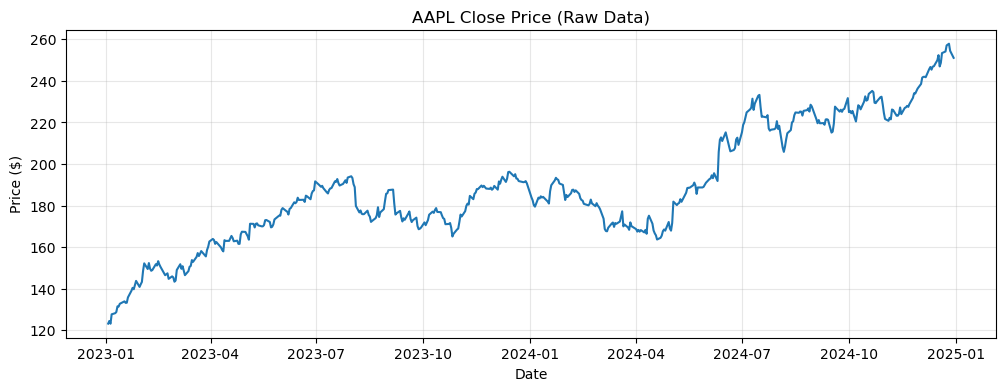

Raw prices show a trend → likely non-stationary


In [30]:
# 2. Plot raw prices
plt.figure(figsize=(12, 4))
plt.plot(df.index, df["Close"])
plt.title("AAPL Close Price (Raw Data)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(alpha=0.3)
plt.show()

print("Raw prices show a trend → likely non-stationary")


In [31]:
# 3. ADF test function
def adf_test(series, name):
    series = series.dropna()
    result = adfuller(series)

    print("\n" + "-"*50)
    print(f"ADF Test: {name}")
    print(f"P-value: {result[1]:.6f}")

    if result[1] < 0.05:
        print("Result: Data is STATIONARY ✅")
    else:
        print("Result: Data is NON-STATIONARY ❌")

    return result[1]


--------------------------------------------------
ADF Test: Raw Prices
P-value: 0.704388
Result: Data is NON-STATIONARY ❌


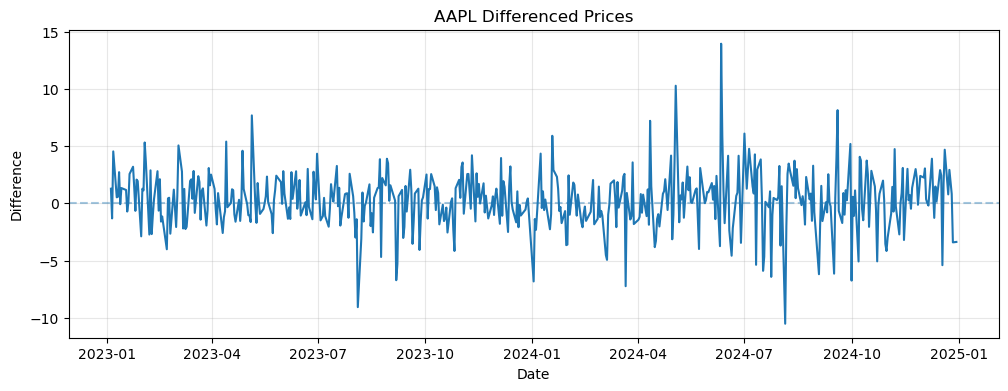


--------------------------------------------------
ADF Test: Differenced Prices
P-value: 0.000000
Result: Data is STATIONARY ✅


In [32]:
# 4. Test raw prices
p_raw = adf_test(df["Close"], "Raw Prices")

# 5. Differencing
df["Diff"] = df["Close"].diff()

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["Diff"])
plt.axhline(0, linestyle="--", alpha=0.4)
plt.title("AAPL Differenced Prices")
plt.xlabel("Date")
plt.ylabel("Difference")
plt.grid(alpha=0.3)
plt.show()

p_diff = adf_test(df["Diff"], "Differenced Prices")

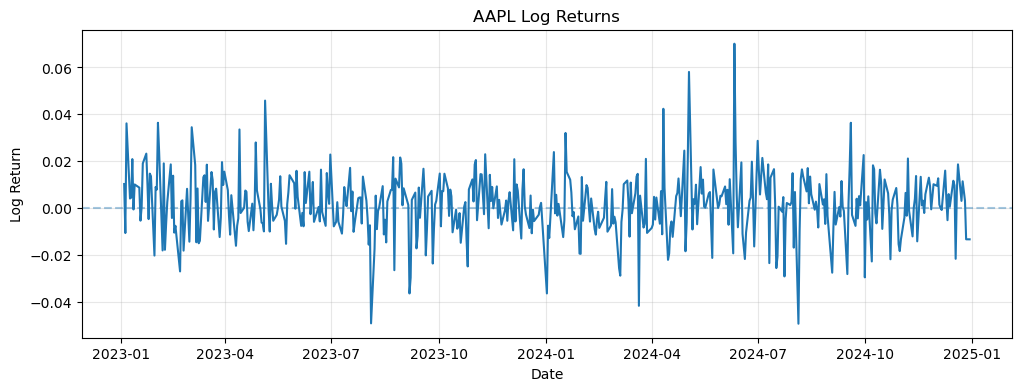


--------------------------------------------------
ADF Test: Log Returns
P-value: 0.000000
Result: Data is STATIONARY ✅


In [33]:
# 6. Log Returns
df["Log_Returns"] = np.log(df["Close"] / df["Close"].shift(1))

plt.figure(figsize=(12, 4))
plt.plot(df.index, df["Log_Returns"])
plt.axhline(0, linestyle="--", alpha=0.4)
plt.title("AAPL Log Returns")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.grid(alpha=0.3)
plt.show()

p_log = adf_test(df["Log_Returns"], "Log Returns")

In [34]:
# 7. Summary
summary = pd.DataFrame({
    "Method": ["Raw Prices", "Differencing", "Log Returns"],
    "P-Value": [p_raw, p_diff, p_log],
    "Stationary": [p_raw < 0.05, p_diff < 0.05, p_log < 0.05]
})

print("\n" + "="*50)
print("STATIONARITY SUMMARY")
print("="*50)
print(summary.to_string(index=False))
print("="*50)


STATIONARITY SUMMARY
      Method  P-Value  Stationary
  Raw Prices 0.704388       False
Differencing 0.000000        True
 Log Returns 0.000000        True


# Challenge 4: Timezone Alignment

In [35]:
from datetime import time
import pytz

# 1. Market settings
IST = pytz.timezone("Asia/Kolkata")
MARKET_CLOSE_TIME = time(15, 30)

# 2. Sample news data (UTC timestamps)
news = {
    "headline": [
        "Apple launches new device",
        "Amazon earnings report",
        "Late night Fed news",
        "Weekend tech update",
        "Sunday market analysis"
    ],
    "utc_time": [
        "2024-01-15 05:00:00",
        "2024-01-15 14:30:00",
        "2024-01-15 20:00:00",
        "2024-01-20 10:00:00",
        "2024-01-21 18:00:00"
    ],
    "sentiment": [0.7, 0.8, -0.2, 0.3, 0.1]
}

df_news = pd.DataFrame(news)
df_news["utc_time"] = pd.to_datetime(df_news["utc_time"]).dt.tz_localize("UTC")

In [36]:
# 3. Convert UTC → IST
df_news["ist_time"] = df_news["utc_time"].dt.tz_convert(IST)

# 4. Trading day alignment logic
def align_to_trading_day(ts):
    """
    Align news timestamp to correct Indian trading day
    """
    # Weekend news → Next Monday
    if ts.weekday() >= 5:
        return (ts + pd.offsets.Week(weekday=0)).date()

    # After market close → Next business day
    if ts.time() > MARKET_CLOSE_TIME:
        return (ts + pd.offsets.BDay(1)).date()

    # Otherwise → Same day
    return ts.date()

df_news["trading_day"] = df_news["ist_time"].apply(align_to_trading_day)

print("\nAligned News Data:")
print(df_news[["headline", "ist_time", "trading_day"]])


Aligned News Data:
                    headline                  ist_time trading_day
0  Apple launches new device 2024-01-15 10:30:00+05:30  2024-01-15
1     Amazon earnings report 2024-01-15 20:00:00+05:30  2024-01-16
2        Late night Fed news 2024-01-16 01:30:00+05:30  2024-01-16
3        Weekend tech update 2024-01-20 15:30:00+05:30  2024-01-22
4     Sunday market analysis 2024-01-21 23:30:00+05:30  2024-01-22


In [37]:
# 5. Aggregate news by trading day
daily_news = (
    df_news
    .groupby("trading_day")
    .agg(
        avg_sentiment=("sentiment", "mean"),
        news_count=("sentiment", "count")
    )
    .reset_index()
)

print("\nDaily News Summary:")
print(daily_news)


Daily News Summary:
  trading_day  avg_sentiment  news_count
0  2024-01-15            0.7           1
1  2024-01-16            0.3           2
2  2024-01-22            0.2           2


In [38]:
# 6. Dummy stock price data (business days only)
trading_days = pd.date_range("2024-01-15", "2024-01-25", freq="B")
df_prices = pd.DataFrame({
    "date": trading_days,
    "close_price": 150 + (pd.Series(range(len(trading_days))) * 0.5)
})

In [40]:
# 7. Merge news with prices
# Ensure same dtype for merge keys
daily_news["trading_day"] = pd.to_datetime(daily_news["trading_day"])

df_final = pd.merge(
    df_prices,
    daily_news,
    left_on="date",
    right_on="trading_day",
    how="left"
).fillna(0)

print("\nFinal Aligned Dataset:")
print(df_final)


Final Aligned Dataset:
        date  close_price          trading_day  avg_sentiment  news_count
0 2024-01-15        150.0  2024-01-15 00:00:00            0.7         1.0
1 2024-01-16        150.5  2024-01-16 00:00:00            0.3         2.0
2 2024-01-17        151.0                    0            0.0         0.0
3 2024-01-18        151.5                    0            0.0         0.0
4 2024-01-19        152.0                    0            0.0         0.0
5 2024-01-22        152.5  2024-01-22 00:00:00            0.2         2.0
6 2024-01-23        153.0                    0            0.0         0.0
7 2024-01-24        153.5                    0            0.0         0.0
8 2024-01-25        154.0                    0            0.0         0.0
